# What is an actor-critic model?

<p align='center'><img src="https://i.imgur.com/5gCs5kH.gif"></img></p>

An actor-critic model is a type of reinforcement learning algorithm that combines the strengths of both value-based and policy-based approaches. It is designed to address the exploration-exploitation trade-off in reinforcement learning and improve learning stability and convergence.

<p align='center'>
    <img src="https://i.stack.imgur.com/ir74w.png"></img>
</p>

The actor-critic model consists of two separate components:

1. Actor: The actor is a policy-based model that learns to take actions in a given state based on a stochastic policy, which is a probability distribution over actions. The goal of the actor is to find the optimal policy, which maximizes the expected cumulative reward.

2. Critic: The critic is a value-based model that learns to estimate the value function (e.g., state-value function V(s) or action-value function Q(s, a)). The value function represents the expected cumulative reward from a given state or state-action pair, following the policy learned by the actor.

The actor and critic work together during the learning process. The critic evaluates the current policy by estimating the value function, while the actor updates its policy based on the feedback provided by the critic. This combination helps the algorithm to explore the environment efficiently, balance exploration and exploitation, and learn a more stable policy.

Actor-critic methods can be implemented using various function approximators, such as neural networks, which can be trained using gradient-based optimization algorithms like stochastic gradient descent. These methods have been widely used in reinforcement learning applications, including robotics, game playing, and control systems.





## Feed-forward Models: Actor and Critic

There are the following components:



### Actor

- `build_actor_network`: The `build_actor_network` function in the provided code is responsible for constructing the actor part of the actor-critic model. The actor is a neural network that learns a policy, which is a probability distribution over actions given the current state. This function defines the architecture of the actor neural network and compiles it using an optimizer and a loss function.

    - `inputs = Input(shape=(self.n_states,))`: This line defines the input layer of the neural network. It takes a state input with shape `(self.n_states,)`, where `self.n_states` is the number of features in the state representation.

    - `x = Dense(16, activation='relu')(inputs)`: This line adds a fully connected `(dense)` layer with 16 hidden units and `ReLU` (Rectified Linear Unit) activation function. This layer processes the input state and learns intermediate representations.

    - `x = Dense(16, activation='relu')(x)`: This line adds another fully connected layer with 16 hidden units and ReLU activation function, further processing the intermediate representations.

    - `output = Dense(self.n_actions, activation='softmax')(x)`: This line defines the output layer of the actor network. It has as many output units as there are actions, denoted by `self.n_actions`. The output layer uses a `softmax` activation function, which produces a probability distribution over actions. This probability distribution represents the policy that the actor learns to follow.

    - `model = Model(inputs=inputs, outputs=output)`: This line creates a Keras Model object with the specified input and output layers. The model represents the actor neural network.

    The `build_actor_network` function returns the compiled actor model, which can be used to predict action probabilities for a given state and update its weights during training.



### Critic

- `build_critic_network`: The function in the provided code is responsible for constructing the critic part of the actor-critic model. The critic is a neural network that learns to estimate the value function (e.g., state-value function V(s) or action-value function Q(s, a)) for the policy learned by the actor. This function defines the architecture of the critic neural network and compiles it using an optimizer and a loss function.

    - `inputs = Input(shape=(self.n_states,))`: This line defines the input layer of the neural network. It takes a state input with shape `(self.n_states,)`, where `self.n_states` is the number of features in the state representation.

    - `x = Dense(16, activation='relu')(inputs)`: This line adds a fully connected `(dense)` layer with 16 hidden units and `ReLU` (Rectified Linear Unit) activation function. This layer processes the input state and learns intermediate representations.

    - `x = Dense(16, activation='relu')(x)`: This line adds another fully connected layer with 16 hidden units and ReLU activation function, further processing the intermediate representations.

    - `output = Dense(1, activation='linear')(x)`: This line defines the output layer of the critic network. It has a single output unit with a linear activation function, which produces the estimated value function for the given input state.

    - `model = Model(inputs=inputs, outputs=output)`: This line creates a Keras Model object with the specified input and output layers. The model represents the critic neural network.

    - `model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr), loss='mean_squared_error')`: This line compiles the model using the Adam optimizer with a learning rate specified by the `lr` parameter. The loss function used is mean squared error, which is suitable for training a neural network to perform regression tasks, such as estimating the value function.

    The `build_critic_network` function returns the compiled critic model, which can be used to predict the value function for a given state and update its weights during training. The critic provides feedback to the actor, helping it improve its policy by identifying which actions lead to higher expected cumulative rewards.


















## Exploration-Exploitation

There are a few more functions. Let us discuss them below.

- The `get_action(self, state)` function is a part of the ActorCritic class, and its purpose is to use the actor model to select an action based on the current state. This function takes the current state as input and returns the selected action according to the policy learned by the actor.

    - `probabilities = self.actor.predict(state[np.newaxis])[0]`: This line uses the actor model to predict the action probabilities for the given state. Since the model expects input in the form of a batch, the state is wrapped in a singleton batch using `state[np.newaxis]`. The `[0]` index extracts the probabilities for the first (and only) element in the batch.

    - `action = np.random.choice(self.n_actions, p=probabilities)`: This line selects an action according to the probability distribution over actions produced by the actor. It uses the np.random.choice function, which randomly samples an element from the given range (0 to self.n_actions - 1) with the specified probabilities. The resulting action follows the policy learned by the actor.

    The `get_action(self, state)` function returns the selected action, which can be used in the environment to execute the action and observe the next state, reward, and done flag. This function is called during the interaction with the environment, both during training and when using the trained actor-critic model for decision-making.

    The `get_action(self, state)` function plays a crucial role in the exploration-exploitation trade-off, as it allows the agent to explore different actions based on the probability distribution produced by the actor. By following the learned policy, the agent can balance exploration (trying out new actions) and exploitation (choosing actions that have led to higher rewards in the past), enabling it to learn more effective policies over time.



## Training

The last piece of puzzle is the `train` function.

- The `train(self, state, action, reward, next_state, done)` function in the ActorCritic class is responsible for updating the actor and critic models based on the experience collected during the agent's interaction with the environment. The function takes the current state, action, reward, next state, and a boolean flag done indicating whether the episode has ended.

    - `target = reward`: This line initializes the target value for the critic with the immediate reward received after taking the action.

    - `if not done: target += self.critic.predict(next_state[np.newaxis])[0][0]`: If the episode has not ended, the function adds the estimated value of the next state to the target. This is obtained by feeding the next state to the critic model and extracting the estimated value from the prediction. This step is based on the concept of bootstrapping, which incorporates the critic's estimate of future rewards into the target value.

    - `td_error = target - self.critic.predict(state[np.newaxis])[0][0]`: This line calculates the temporal difference (TD) error, which is the difference between the target value and the critic's current estimate of the state value. The TD error serves as a learning signal for both the actor and the critic.

    - `target_vec = self.critic.predict(state[np.newaxis])`: This line predicts the current state's value using the critic model and stores it in target_vec. This is done to create a target vector for training the critic with the same shape as the critic's output.

    - `target_vec[0][0] = target`: This line updates the first element of target_vec with the calculated target value. This target value now includes the immediate reward and, if the episode has not ended, the estimated value of the next state.

    - `self.critic.train_on_batch(state[np.newaxis], target_vec)`: This line trains the critic model using the train_on_batch method, which performs a single gradient update on the given state and target vector. This step updates the critic's weights to reduce the difference between its predicted state value and the target value.

    - `advantages = np.zeros((1, self.n_actions))`: This line initializes an "advantages" vector with the same shape as the actor's output. This vector will be used to train the actor by providing the TD error as a learning signal for the chosen action.

    - `advantages[0][action] = td_error`: This line sets the advantage of the chosen action in the advantages vector to the calculated TD error. The advantages of other actions remain zero, so their probabilities won't be updated during training.

    - `self.actor.train_on_batch(state[np.newaxis], advantages)`: This line trains the actor model using the train_on_batch method with the given state and advantages vector. This step updates the actor's weights to maximize the probability of the chosen action, guided by the TD error provided by the critic.

    The `train` function updates both the actor and critic models using the TD error as a learning signal. This enables the actor to improve its policy, while the critic refines its value function estimates, resulting in better decision-making and more effective exploration and exploitation.





## Library

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tqdm import tqdm

In [97]:
class ActorCritic:
    def __init__(self, n_states, n_actions, actor_lr=0.001, critic_lr=0.01):
        self.n_states = n_states
        self.n_actions = n_actions

        self.actor = self.build_actor_network(actor_lr)
        self.critic = self.build_critic_network(critic_lr)

    def build_actor_network(self, lr):
        inputs = Input(shape=(self.n_states,))
        x = Dense(16, activation='relu')(inputs)
        x = Dense(16, activation='relu')(x)
        output = Dense(self.n_actions, activation='softmax')(x)
        model = Model(inputs=inputs, outputs=output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy')
        return model

    def build_critic_network(self, lr):
        inputs = Input(shape=(self.n_states,))
        x = Dense(16, activation='relu')(inputs)
        x = Dense(16, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        model = Model(inputs=inputs, outputs=output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')
        return model

    def get_action(self, state):
        probabilities = self.actor.predict(state[np.newaxis], verbose=0)[0]
        action = np.random.choice(self.n_actions, p=probabilities)
        return action

    def train(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target += self.critic.predict(next_state[np.newaxis], verbose=0)[0][0]

        td_error = target - self.critic.predict(state[np.newaxis], verbose=0)[0][0]
        target_vec = self.critic.predict(state[np.newaxis], verbose=0)
        target_vec[0][0] = target
        self.critic.train_on_batch(state[np.newaxis], target_vec)

        advantages = np.zeros((1, self.n_actions))
        advantages[0][action] = td_error
        self.actor.train_on_batch(state[np.newaxis], advantages)

        return state, action, reward, next_state, done


## Generate Random Data

In [123]:
# Environment parameters
n_states = 9
n_actions = 9

# Generate fake data
n_samples = 100
states = np.random.randint(0, 2, size=(n_samples, n_states))
next_states = np.random.randint(0, 2, size=(n_samples, n_states))
rewards = np.random.randint(-1, 2, size=(n_samples,))
actions = np.random.randint(0, n_actions, size=(n_samples,))
dones = np.random.randint(0, 2, size=(n_samples,))

# Dimension
print(f"State has dim: {states.shape}")
print(f"Next State has dim: {next_states.shape}")
print(f"Reward has dim: {rewards.shape}")
print(f"Action has dim: {actions.shape}")
print(f"Dones has dim: {dones.shape}")

State has dim: (100, 9)
Next State has dim: (100, 9)
Reward has dim: (100,)
Action has dim: (100,)
Dones has dim: (100,)


## Generate Realistic Data

<p align='center'><img src="https://media.tenor.com/rH3Yh7-6UhsAAAAC/cereal-tic-tac-toe.gif"></img></p>

To generate a more realistic tic-tac-toe dataset with valid actions, rewards, and dones, we can simulate games and record the agent's experiences during gameplay. For simplicity, we will assume player 1 (X) and player 2 (O) take turns playing randomly. Here's the code to generate such a dataset:

In this code, we first define a `check_winner()` function that checks if either player has won. Then, we loop through the desired number of games and simulate each game by alternating between players and selecting random valid actions. We store the states, next states, actions, rewards, and done flags for each step of the game. Finally, we convert these lists to NumPy arrays.

This dataset represents a more realistic tic-tac-toe dataset that can be used to train a reinforcement learning model. Keep in mind that since the actions are selected randomly, the dataset's quality may not be optimal for learning an optimal strategy. However, it is a better starting point than a completely random dataset.

### Check Winner Function

The `check_winner()` function takes a 1D NumPy array representing a tic-tac-toe board and checks if either player 1 (X) or player 2 (O) has won. If a winner is found, the function returns the winner's number (1 or 2). If there is no winner, the function returns 0.

Here's a breakdown of the function:

- `lines`: This variable defines a list of 8 possible winning lines in a tic-tac-toe board. Each line represents a row, column, or diagonal. For example, `board[0:3]` represents the first row, `board[3:6]` represents the second row, `board[6:9]` represents the third row, and so on.

- The `for` loop iterates through each line in the lines list.

    a. `if np.all(line == 1)`: The `np.all()` function checks if all elements in the line array are equal to 1, which indicates that player 1 has a winning line. If this condition is met, the function returns 1.

    b. `elif np.all(line == 2)`: Similar to the previous condition, this checks if all elements in the `line` array are equal to 2, which indicates that player 2 has a winning line. If this condition is met, the function returns 2.

- If the `for` loop completes without finding a winner, the function returns 0, indicating that there is no winner in the current board state.

The `check_winner()` function is a utility function used during the game simulation to determine if a player has won after making a move. This information is used to update the rewards and done flags in the dataset appropriately.

In the `check_winner()` function, we rely on `np.all()` function.

`np.all()` is a function in the NumPy library that tests whether all elements in an input array (or along a specified axis) evaluate to True. It returns a single boolean value, True if all elements are True and False otherwise.

```py
import numpy as np

arr = np.array([True, True, True])
result = np.all(arr)
print(result)  # Output: True

arr = np.array([True, False, True])
result = np.all(arr)
print(result)  # Output: False
```

In the code provided below, `np.all(line == 1)` checks if all elements in the `line` array are equal to 1. Similarly, `np.all(line == 2)` checks if all elements in the `line` array are equal to 2. These checks are used to determine if a player has won the game by having a complete row, column, or diagonal with their respective number (1 or 2).





In [98]:
def check_winner(board):
    lines = [
        board[0:3], board[3:6], board[6:9],      # Rows
        board[0::3], board[1::3], board[2::3],   # Columns
        board[0::4], board[2:8:2]                # Diagonals
    ]
    
    for line in lines:
        if np.all(line == 1):
            return 1
        elif np.all(line == 2):
            return 2
    return 0


1. The for loop iterates num_games times, which is set to 100. This means the code will simulate 100 games. This assumes if `num_games` is set to be 100 in the code below.

```py
for _ in range(num_games):
```

2. Initialize the `board` as a 1D numpy array of length 9 with all zeros, representing an empty Tic-Tac-Toe board. Set `player` to 1, representing the first player.

```py
    board = np.zeros(9)
    player = 1
```

3. The inner while loop runs until the game ends (either a player wins, or the board is full).

```py
    while True:
```

4. Find the valid actions (empty spots on the board) and choose a random action from them.

```py
        valid_actions = np.where(board == 0)[0]
        action = np.random.choice(valid_actions)
```

5. Create a copy of the current board and apply the chosen action by setting the corresponding cell to the current player's number (1 or 2).

```py
        next_board = board.copy()
        next_board[action] = player
```

6. Check if there is a winner or if the game has ended by analyzing the updated board.

```py
        winner = check_winner(next_board)
        done = winner != 0 or len(valid_actions) == 1
```

7. Calculate the reward based on the winner. If player 1 wins, the reward is 1. If player 2 wins, the reward is -1. If the game is a draw or hasn't ended yet, the reward is 0.

```py
        reward = 0
        if winner == 1:
            reward = 1
        elif winner == 2:
            reward = -1
```

8. Append the current board state, next state, action, reward, and done status to their respective lists.

```py
        states.append(board)
        next_states.append(next_board)
        actions.append(action)
        rewards.append(reward)
        dones.append(done)
```

9. If the game has ended, break out of the while loop.

```py
        if done:
            break
```

10. If the game hasn't ended, update the board to the next state and switch to the other player.

```py
        board = next_board
        player = 3 - player  # Switch between 1 and 2
```

After the for loop has completed, the code converts the lists to numpy arrays and prints the dimensions of the arrays.



### Create Data

In [122]:
valid_actions

array([7])

In [120]:
# Environment parameters
n_states = 9
n_actions = 9

states = []
next_states = []
actions = []
rewards = []
dones = []

num_games = 10000

for _ in range(num_games):
    board = np.zeros(9)
    player = 1
    
    while True:
        valid_actions = np.where(board == 0)[0]
        action = np.random.choice(valid_actions)
        
        next_board = board.copy()
        next_board[action] = player
        
        winner = check_winner(next_board)
        done = winner != 0 or len(valid_actions) == 1
        
        reward = 0
        if winner == 1:
            reward = 1
        elif winner == 2:
            reward = -1
            
        states.append(board)
        next_states.append(next_board)
        actions.append(action)
        rewards.append(reward)
        dones.append(done)
        
        if done:
            break
        
        board = next_board
        player = 3 - player  # Switch between 1 and 2

states = np.array(states)
next_states = np.array(next_states)
actions = np.array(actions)
rewards = np.array(rewards)
dones = np.array(dones)

# Dimension
print(f"State has dim: {states.shape}")
print(f"Next State has dim: {next_states.shape}")
print(f"Reward has dim: {rewards.shape}")
print(f"Action has dim: {actions.shape}")
print(f"Dones has dim: {dones.shape}")

State has dim: (76063, 9)
Next State has dim: (76063, 9)
Reward has dim: (76063,)
Action has dim: (76063,)
Dones has dim: (76063,)


### Visualize Generated Training Data

Let us use `matplotlib.pyplot` or also short for `plt` to visualize the data that we generated. It is fake data, but it is generated using certain rules. Let's visualize if it makes sense.

In [100]:
# check one instance
i = 1
states[i], next_states[i], rewards[i], actions[i], dones[i]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 2., 1., 0., 0.]),
 0,
 5,
 False)

In [101]:
def plot_3x3_array(arr):
    if arr.shape != (3, 3):
        raise ValueError("Input array should be of shape (3, 3)")

    plt.figure(figsize=(5, 5))
    fig, ax = plt.subplots(3, 3, figsize=(5, 5))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    for i in range(3):
        for j in range(3):
            ax[i, j].text(0.5, 0.5, str(arr[i, j]), fontsize=14, ha='center', va='center')
            ax[i, j].axis('off')

    plt.show()

In [102]:
# start of a game out of many sequences of games
np.where(dones==True)

(array([  6,  15,  21,  30,  38,  44,  53,  62,  67,  72,  80,  89,  96,
        102, 111, 118, 125, 134, 141, 150, 158, 165, 172, 181, 186, 195,
        202, 207, 215, 222, 230, 235, 244, 253, 258, 266, 273, 282, 289,
        297, 306, 311, 320, 329, 338, 346, 355, 364, 373, 380, 388, 397,
        403, 412, 420, 427, 435, 444, 453, 462, 469, 478, 485, 491, 498,
        507, 515, 523, 531, 540, 549, 558, 567, 576, 585, 591, 598, 606,
        615, 622, 631, 640, 645, 653, 662, 669, 678, 683, 692, 698, 705,
        712, 721, 730, 738, 746, 754, 762, 767, 774]),)

Step=763; Game status:False


<Figure size 360x360 with 0 Axes>

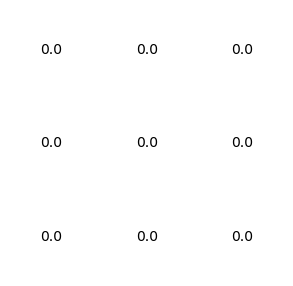

Step=764; Game status:False


<Figure size 360x360 with 0 Axes>

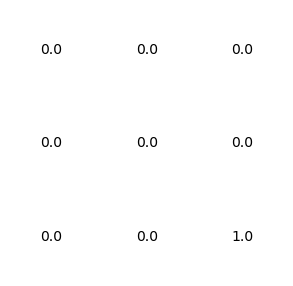

Step=765; Game status:False


<Figure size 360x360 with 0 Axes>

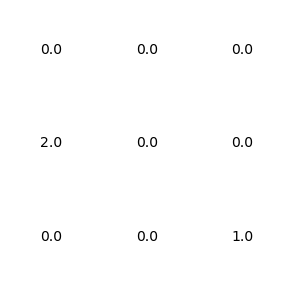

Step=766; Game status:False


<Figure size 360x360 with 0 Axes>

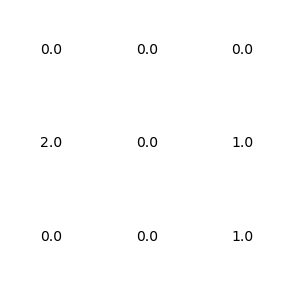

Step=767; Game status:True


<Figure size 360x360 with 0 Axes>

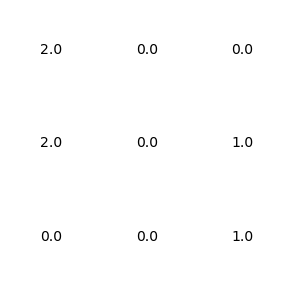

In [105]:
i = 763
while True:
    print(f"Step={i}; Game status:{dones[i]}")
    plot_3x3_array(states[i].reshape((3, 3)))
    if dones[i] == True:
        break
    else:
        i += 1

## Fitting the Data

In [125]:
# Initialize the actor-critic model
actor_critic = ActorCritic(n_states, n_actions)

# Train the model using the fake data
all_results = []
for i in range(n_samples):
    state = states[i]
    action = actions[i]
    reward = rewards[i]
    next_state = next_states[i]
    done = bool(dones[i])

    this_result = actor_critic.train(state, action, reward, next_state, done)
    all_results.append(this_result)

    if i % 10 == 0:
        print(f">> finished with sample: {i}/{n_samples}; current rewards={rewards[i]} <<")

>> finished with sample: 0/100; current rewards=-1 <<
>> finished with sample: 10/100; current rewards=1 <<
>> finished with sample: 20/100; current rewards=1 <<
>> finished with sample: 30/100; current rewards=1 <<
>> finished with sample: 40/100; current rewards=0 <<
>> finished with sample: 50/100; current rewards=-1 <<
>> finished with sample: 60/100; current rewards=1 <<
>> finished with sample: 70/100; current rewards=1 <<
>> finished with sample: 80/100; current rewards=-1 <<
>> finished with sample: 90/100; current rewards=-1 <<


## Prediction

Let us check if the system works. Provided with a `test_state` the AI model should be able to make some guesses.

In [113]:
# Test the trained model
test_state = np.random.randint(0, 2, size=(n_states,))
action = actor_critic.get_action(test_state)
print(f"Test state: {test_state}, Selected action: {action}")

Test state: [0 0 1 0 1 0 1 1 1], Selected action: 6


## Play: Let's play against this AI!

We just trained a model called `actor_critic` to learn to play tic-tac-toe on simulated data. Let us try to set up a game to play with it.

<Figure size 360x360 with 0 Axes>

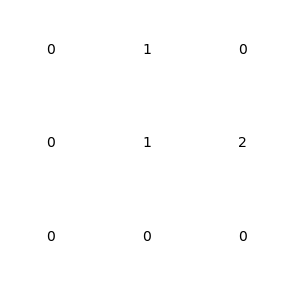

Test state: [0 1 0 0 1 2 0 0 0], Selected action: 5


In [119]:
test_state = np.array([
    0, 1, 0,
    0, 1, 2,
    0, 0, 0
])
plot_3x3_array(test_state.reshape((3, 3)))
action = actor_critic.get_action(test_state)
print(f"Test state: {test_state}, Selected action: {action}")

Done.